<img align = 'center' src="./Images/ML_SWE.jpg" alt = 'image' width = '1000'/>

## Prediction Simulation for Water Year 2019

We will be testing and evaluating the performance of the model over the 2019 WY at select locations

For example, the operational capacity of the model should begin at the beginning of the water year (WY week 1) with a previous SWE value of 0-in for each 1-km grid.
Model evaluation could then assess the forecasting skill on a hold-out dataset of an entire year in which known neighboring values do not control predictions, but rather driving to-date predictions from the predicted previous SWE values. 
Due to the high model performance, future work will target the assessment of model skill with an operational motivation

## Model Training/Testing influence on Model Results.

The model training/testing partitioning methodology has a strong influence on model performance and the goal of model evaluation.
The objective of the modeling effort was to examine the spatial extrapolation capacity of the model from selected monitoring stations to the overall region, best suited to a 75/25% training/testing split, respectively.
While it is critical to address the strong serial correlation in SWE accumulation and melt throughout the season, the high correlation between weeks has the potential to inflate model skill when using a 75/25% training/testing split due to the previous SWE feature being known.
An assessment of the operational capacity of the model is different than assessing the ability to extrapolate regional SWE from in-situ monitoring stations.
For example, the operational capacity of the model should begin at the beginning of the water year (WY week 1) with a previous SWE value of 0-in for each 1-km grid.
Model evaluation could then assess the forecasting skill on a hold-out dataset of an entire year in which known neighboring values do not control predictions, but rather driving to-date predictions from the predicted previous SWE values. 
Due to the high model performance, future work will target the assessment of model skill with an operational motivation.

In [1]:
import os
import NSM_SCA
import Hindcast_Initialization

2023-11-09 23:34:18.341237: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-09 23:34:18.345532: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-09 23:34:18.345550: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Bring prediction DFs in
The Prediction DFs do not always store after a git push and this will save your results, make sure you have the correct model name in the function

In [2]:
Hindcast_Initialization.AWS_to_Hindcast('Neural_Network')

100%|██████████| 81/81 [00:49<00:00,  1.64it/s]


# Initiate Simulation

You can run all regions or just ones for development, not that only the regions entered below will work for the Hindcast Evaluator

In [46]:
new_year = '2019'
threshold = '20.0' #This threshold is standardized for now, to recalculate see Dr. Johnson
Region_list = [ 'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low','Greater_Yellowstone', 
    'N_Co_Rockies', 'SW_Mont', 'SW_Co_Rockies', 'GBasin', 'N_Wasatch', 'N_Cascade',
     'S_Wasatch', 'SW_Mtns', 'E_WA_N_Id_W_Mont', 'S_Wyoming', 'SE_Co_Rockies', 
     'Sawtooth', 'Ca_Coast', 'E_Or', 'N_Yellowstone', 'S_Cascade', 'Wa_Coast',
     'Greater_Glacier', 'Or_Coast'
              ]



datelist = Hindcast_Initialization.Hindcast_Initialization(new_year, threshold, Region_list, SCA = True)

Creating files for a historical simulation within  'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low', 'Greater_Yellowstone', 'N_Co_Rockies', 'SW_Mont', 'SW_Co_Rockies', 'GBasin', 'N_Wasatch', 'N_Cascade', 'S_Wasatch', 'SW_Mtns', 'E_WA_N_Id_W_Mont', 'S_Wyoming', 'SE_Co_Rockies', 'Sawtooth', 'Ca_Coast', 'E_Or', 'N_Yellowstone', 'S_Cascade', 'Wa_Coast', 'Greater_Glacier', 'Or_Coast'  regions for water year  2019
New simulation start files complete


## Run your SSM in hindcast mode to evaluate operational capacity.



In [47]:
#run the model through all time (data acqusition already completed)
for day in datelist:
    print('Updating SWE predictions for ', day)
    #connect interactive script to Wasatch Snow module
    Snow = NSM_SCA.NSM_SCA(day, threshold=threshold, Regions = Region_list)
    
    #Go get SNOTEL observations - all data currently loaded, set to True to download
    #Snow.Get_Monitoring_Data_Threaded(getdata = True)

    #Initialize/Download the granules, all data preprocessed for the SSM activRegion_listhange to True to use the functions.
    #Snow.initializeGranules(getdata = True)

    #Process observations into Model prediction ready format,
    #Snow.Data_Processing(SCA = True)

    #Agument with SCA
    #Snow.augmentPredictionDFs()

    #Make predictions, set NewSim to True if you have al
    Snow.SWE_Predict(NewSim = False) #Look to multiprocess, each region can do a prediction to speed things up.

Updating SWE predictions for  2018-10-02
Making predictions for:  2018-10-02
N_Sierras
72/72 [==============================] - 0s 1ms/step
S_Sierras_High
6/6 [==============================] - 0s 1ms/step
S_Sierras_Low
4/4 [==============================] - 0s 2ms/step
Greater_Yellowstone
63/63 [==============================] - 0s 1ms/step
N_Co_Rockies
71/71 [==============================] - 0s 1000us/step
SW_Mont
1/1 [==============================] - 0s 75ms/step
SW_Co_Rockies
53/53 [==============================] - 0s 1ms/step
GBasin
1/1 [==============================] - 0s 75ms/step
N_Wasatch
1/1 [==============================] - 0s 89ms/step
N_Cascade
1/1 [==============================] - 0s 77ms/step
S_Wasatch
1/1 [==============================] - 0s 72ms/step
SW_Mtns
1/1 [==============================] - 0s 78ms/step
E_WA_N_Id_W_Mont
1/1 [==============================] - 0s 80ms/step
S_Wyoming
1/1 [==============================] - 0s 69ms/step
SE_Co_Rockies
1/1 [=====

### Model Hindcast complete

Lets see how your model performs within SSWEET in the [Hindcast_Evaluation](./Hindcast_Evaluation.ipynb) notebook.

processing predictions into geodataframe


100%|██████████| 39/39 [00:00<00:00, 41.36it/s]


creating figures for each prediction timestep


100%|██████████| 39/39 [00:49<00:00,  1.27s/it]


Figures complete, creating .gif image


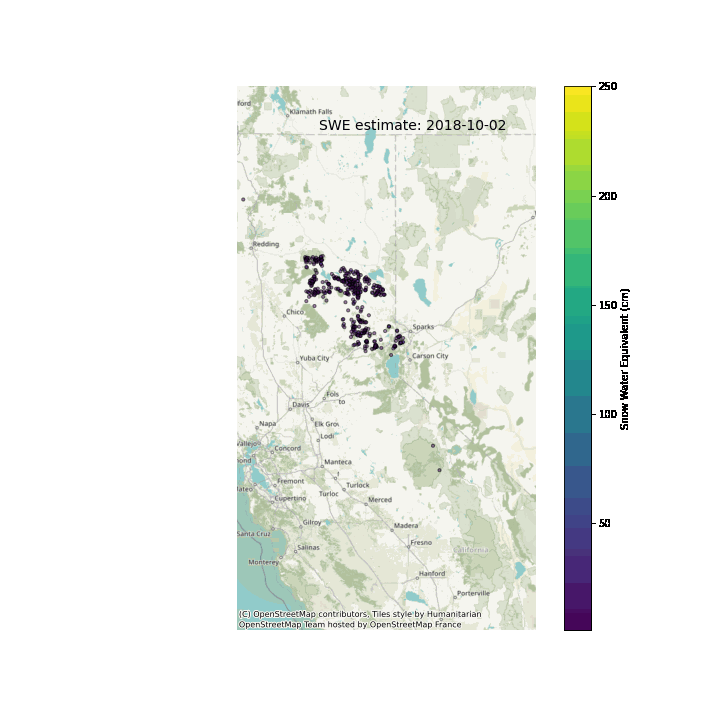

In [5]:
#Hindcast_Initialization.Snowgif(datelist, Region_list)

# Load model predictions to AWS if you are happy with the performance
Make sure to end in the correct model name

In [3]:
#Upload predictions for storage to AWS
Hindcast_Initialization.Hindcast_to_AWS('Neural_Network')

Pushing files to AWS


100%|██████████| 80/80 [00:48<00:00,  1.66it/s]
